### Formulating and simulating a hypothesis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize':(11,8)})

#### Hypothesis testing
- Assessment of how reasonable the observed data are assuming a hypothesis is true

#### Null hypothesis
- Another name for the hypothesis you are testing

#### Permutation
- Random reordering of entries in an array

In [3]:
swing = pd.read_csv('2008_swing_states.csv')
swing.head(3)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07


In [4]:
dem_share_PA = swing.dem_share.loc[swing['state'] == 'PA']

In [5]:
dem_share_OH = swing.dem_share.loc[swing['state'] == 'OH']

In [6]:
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))
dem_share_perm = np.random.permutation(dem_share_both)
perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

In [7]:
def permutation_sample(data1, data2):
    '''Generate a permutation sample from two data sets.'''
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

In [8]:
sheffield = pd.read_csv('sheffield_weather_station.csv', sep = '\s+', skiprows=8)
sheffield.head(3)

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---


In [9]:
rain_june = sheffield.rain.loc[sheffield['mm'] == 6][:-1]
rain_november = sheffield.rain.loc[sheffield['mm'] == 11]
print(len(rain_june), len(rain_november))

133 133


In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

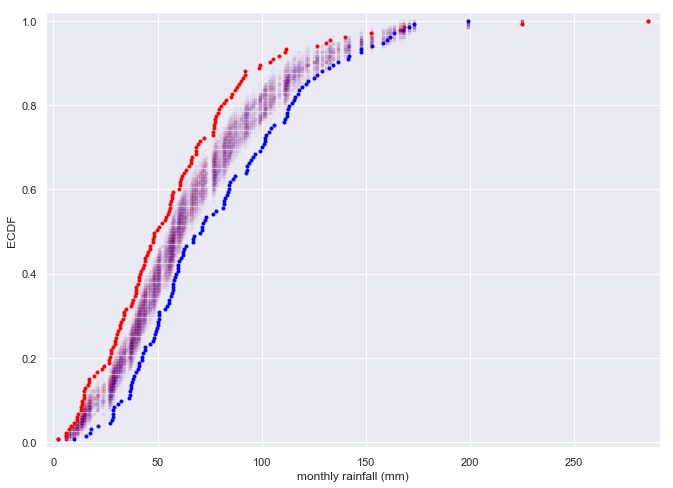

In [11]:
for _ in range(50):
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)
    
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                color='blue', alpha=0.02)

x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november) 
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')

#### Test statistics and p-values

#### Hypothesis testing 
- Assessment of how reasonable the observed data are assuming a hypothesis is true

#### Test statistic 
- A single number that can be computed from observed data and from data you simulate under the null hypothesis
- It serves as a basis of comparison between the two

#### Permutation replicate

In [12]:
np.mean(perm_sample_PA) - np.mean(perm_sample_OH)

-0.18933853459972738

In [13]:
np.mean(dem_share_PA) - np.mean(dem_share_OH)

1.1582360922659518

#### p-value
- The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true
- **IT IS NOT THE PROBABILITY THAT THE NULL HYPOTHESIS IS TRUE**

### Statistical significance
- Determined by the smallness of a p-value

### Null hypothesis significance testing (NHST)

In [14]:
def draw_perm_reps(data_1, data_2, func, size=1):
    '''Generates multiple permutaion replicates'''
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

In [15]:
tongues = pd.read_csv('frog_tongue.csv', skiprows=14)
tongues.head(3)

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239


In [16]:
dfA = tongues['impact force (mN)'].loc[tongues['ID'] == 'II']/1000
dfB = tongues['impact force (mN)'].loc[tongues['ID'] == 'IV']/1000
df_A = pd.DataFrame({'ID': 'A', 'impact_force': dfA})
df_B = pd.DataFrame({'ID': 'B', 'impact_force': dfB})
df = pd.concat([df_A, df_B])
df.head()

,ID,impact_force
20,A,1.612
21,A,0.605
22,A,0.327
23,A,0.946
24,A,0.541


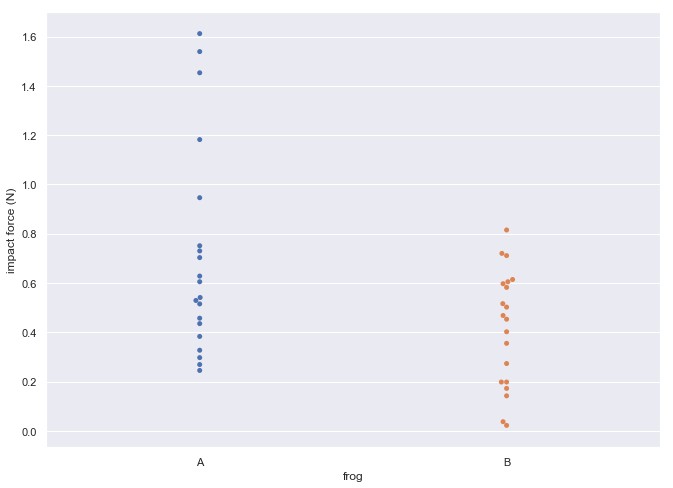

In [17]:
_ = sns.swarmplot(x='ID', y='impact_force', data=df)
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

In [18]:
force_a = np.array(df_A['impact_force'])
force_b = np.array(df_B['impact_force'])
force_a

array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])

In [19]:
def diff_of_means(data_1, data_2):
    '''Difference of means of two arrays.'''
    diff = data_1.mean() - data_2.mean()
    return diff

empirical_diff_means = diff_of_means(force_a, force_b)
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
p

0.0053

## Bootstrap hypothesis testing
#### Pipeline for hypothesis testing 
- Clearly state the null hypothesis 
- Define your test statistic 
- Generate many sets of simulated data assuming the null hypothesis is true 
- Compute the test statistic for each simualated data set
- The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data


### The Null hypothesis
- The true mean speed of light in Michelson's experiments was actually Newcomb's reported value.

#### Shifting the Michelson data

In [20]:
michelson_speed_of_light = pd.read_csv('michelson_speed_of_light.csv')
michelson_speed_of_light = np.array(michelson_speed_of_light['velocity of light in air (km/s)'])

newcombe_value = 299860
michelson_shifted = michelson_speed_of_light - np.mean(michelson_speed_of_light) + newcombe_value
michelson_shifted

array([299857.6, 299747.6, 299907.6, 300077.6, 299937.6, 299857.6,
       299957.6, 299987.6, 299987.6, 299887.6, 300007.6, 299987.6,
       299937.6, 299657.6, 299767.6, 299817.6, 300007.6, 300007.6,
       299967.6, 299967.6, 299967.6, 299947.6, 299967.6, 299947.6,
       299887.6, 299807.6, 299857.6, 299887.6, 299907.6, 299847.6,
       299837.6, 299797.6, 299817.6, 299887.6, 299887.6, 299837.6,
       299807.6, 299797.6, 299767.6, 299807.6, 299887.6, 299887.6,
       299887.6, 299867.6, 299727.6, 299727.6, 299627.6, 299867.6,
       299977.6, 299957.6, 299887.6, 299917.6, 299857.6, 299877.6,
       299847.6, 299847.6, 299857.6, 299847.6, 299847.6, 299847.6,
       299897.6, 299817.6, 299817.6, 299827.6, 299807.6, 299777.6,
       299767.6, 299747.6, 299757.6, 299767.6, 299917.6, 299927.6,
       299897.6, 299867.6, 299887.6, 299727.6, 299847.6, 299857.6,
       299857.6, 299787.6, 299897.6, 299847.6, 299787.6, 299817.6,
       299767.6, 299817.6, 299797.6, 299817.6, 299827.6, 29985

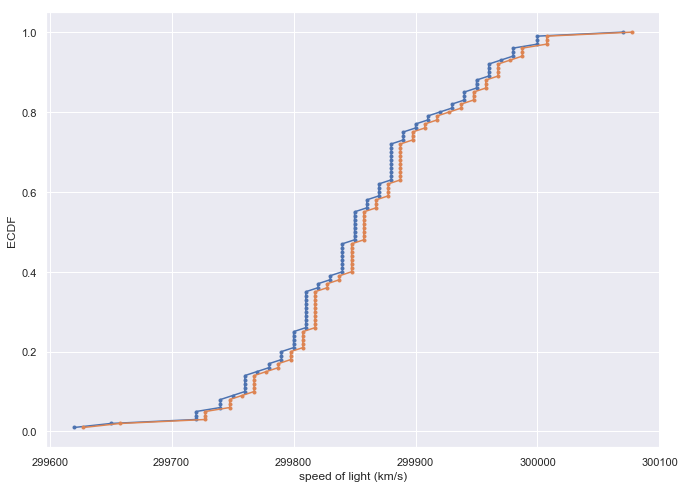

In [21]:
x, y = ecdf(michelson_speed_of_light)
x_shift, y_shift = ecdf(michelson_shifted)
_ = plt.plot(x, y, marker='.')
_ = plt.plot(x_shift, y_shift, marker='.')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('ECDF')

In [22]:
def diff_from_newcomb(data, newcombe_value=299860):
    return np.mean(data) - newcombe_value

diff_observed = diff_from_newcomb(michelson_speed_of_light)

diff_observed

-7.599999999976717

In [23]:
# def bootstrap_replicate_1d(data, func):
#     '''Generate bootstrap replicate of 1D data.'''
#     bs_sample = np.random.choice(data, len(data))
#     return func(bs_sample)

In [24]:
def draw_bs_reps(data, func, size=1):
    '''Draw bootstrap replicates'''
    bs_replicates = np.empty(size)
    
    def bootstrap_replicate_1d(data, func):
        '''Generate bootstrap replicate of 1D data.'''
        bs_sample = np.random.choice(data, len(data))
        return func(bs_sample)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

In [25]:
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)
bs_replicates

array([ 9.00000000e-01,  7.30000000e+00,  1.16415322e-10, ...,
       -4.00000000e+00, -4.70000000e+00, -7.30000000e+00])

In [26]:
p_value = np.sum(bs_replicates <= diff_observed) / 10000
p_value

0.162

This suggests the Newcombe and Michelson didn't have fundamental differences in their measurements.

### One sample
- Compare one set of data to a single number

### Two sample test
- Compare two sets of data

In [27]:
translated_force_b = force_b - np.mean(force_b) + 0.55
translated_force_b

array([0.3029, 0.2729, 0.1679, 0.5839, 0.4859, 0.1529, 0.6329, 0.4039,
       0.8509, 0.7129, 0.3289, 0.3289, 0.7279, 0.6469, 0.9459, 0.5329,
       0.7359, 0.8419, 0.7449, 0.5989])

In [28]:
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)
bs_replicates

array([0.5293 , 0.5804 , 0.6585 , ..., 0.5684 , 0.5512 , 0.51715])

In [29]:
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000
p

0.0062

In [33]:
empirical_diff_means = 0.28825000000000006
forces_concat = np.array([df.impact_force])
forces_concat, empirical_diff_means

(array([[1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
         0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
         0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
         0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
         0.605, 0.711, 0.614, 0.468]]), 0.28825000000000006)

In [34]:
mean_force = np.mean(forces_concat)
mean_force

0.563225

In [35]:
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

In [36]:
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

In [37]:
bs_replicates = bs_replicates_b - bs_replicates_a

In [43]:
p_value = np.sum(bs_replicates >= np.mean(forces_concat))/ 10000
p_value

0.0